Apps Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None

User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 en

C:\Users\Bala Krishnan\AppData\Local\Temp\ipykernel_25652\60339431.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


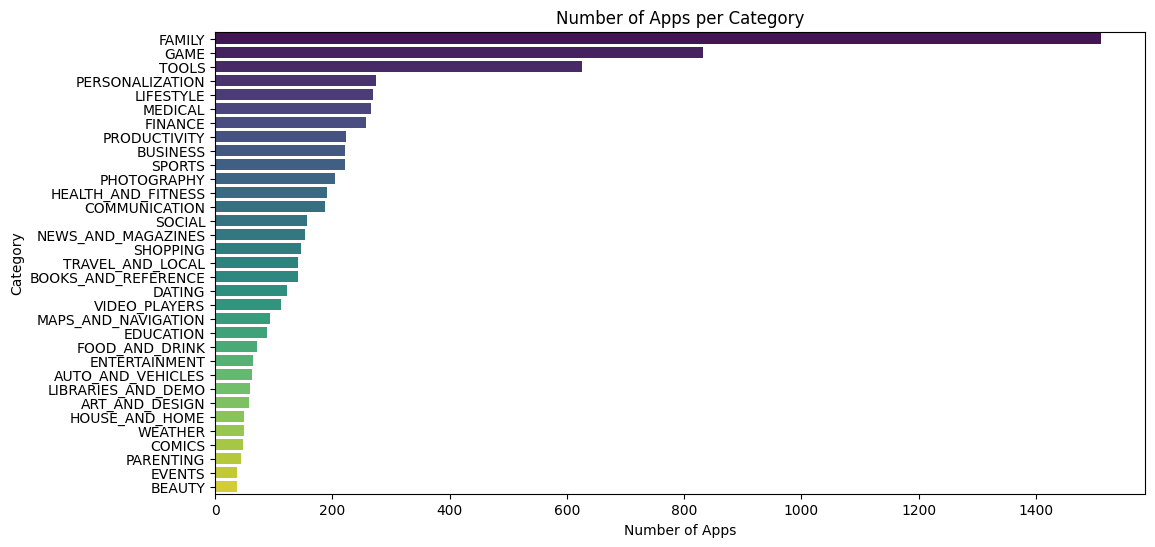

C:\Users\Bala Krishnan\AppData\Local\Temp\ipykernel_25652\60339431.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_ratings.index, x=category_ratings.values, palette='coolwarm')


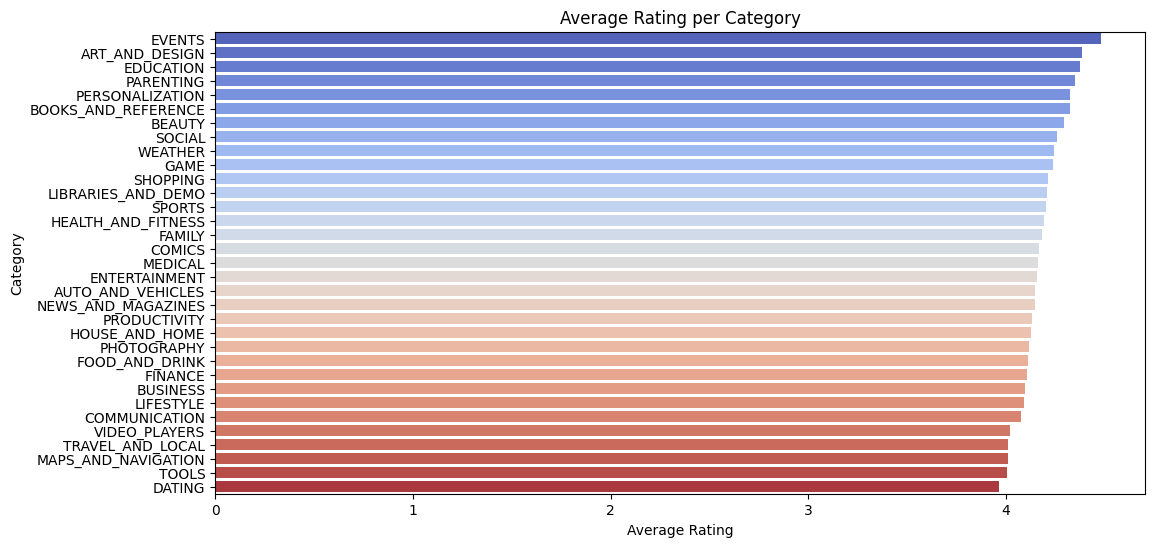

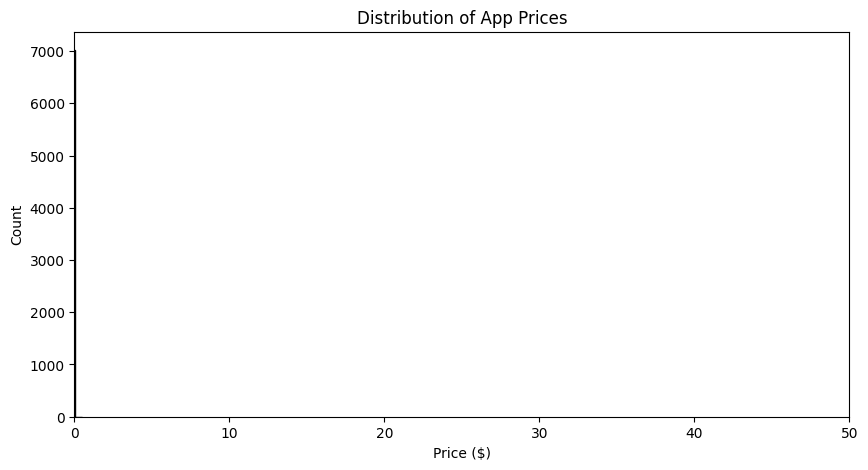

Top 10 Most Reviewed Apps:
                                                    App   Reviews
1372                                     Clash of Clans  44891723
1356                                     Subway Surfers  27722264
1362                                       Clash Royale  23133508
1357                                   Candy Crush Saga  22426677
342         UC Browser - Fast Download Private & Secure  17712922
1377                                        8 Ball Pool  14198297
7778  DU Battery Saver - Battery Charger & Battery Life  13479633
2512  Cache Cleaner-DU Speed Booster (booster & clea...  12759663
1527                                     Shadow Fight 2  10979062
1364                                                Pou  10485308


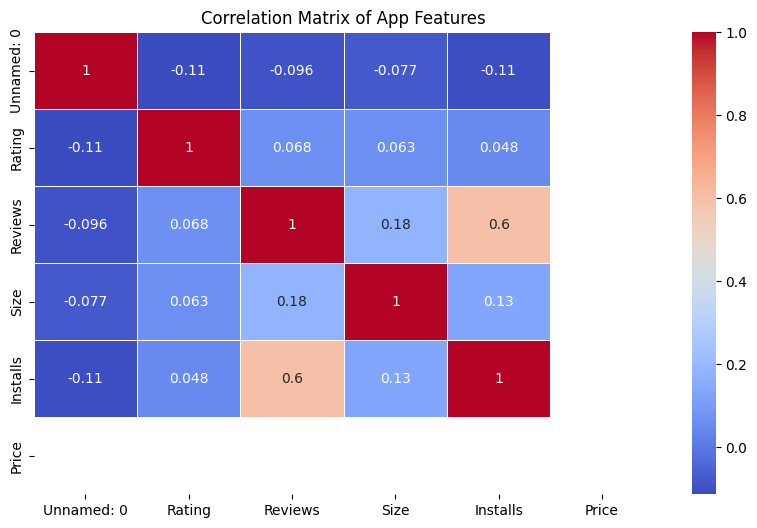

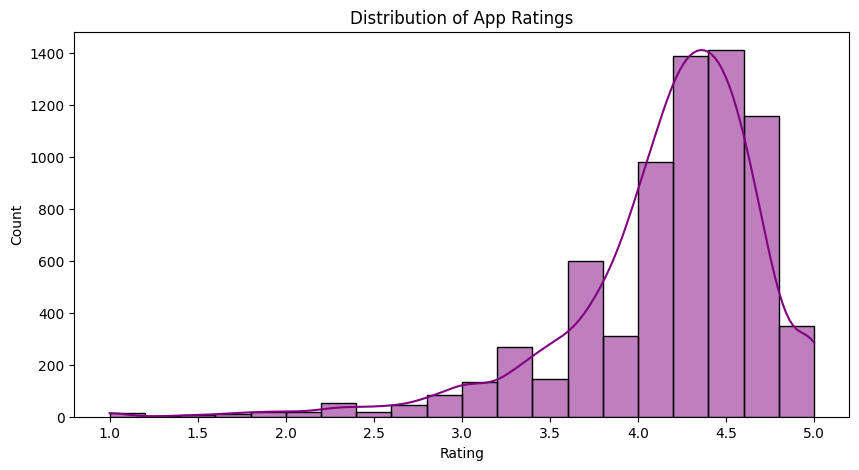

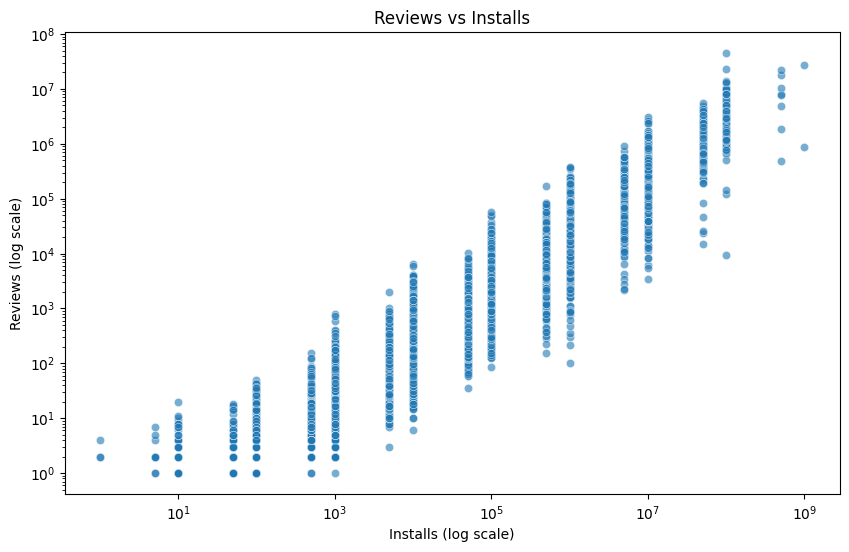

C:\Users\Bala Krishnan\AppData\Local\Temp\ipykernel_25652\60339431.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=apps_df, palette='Set3')


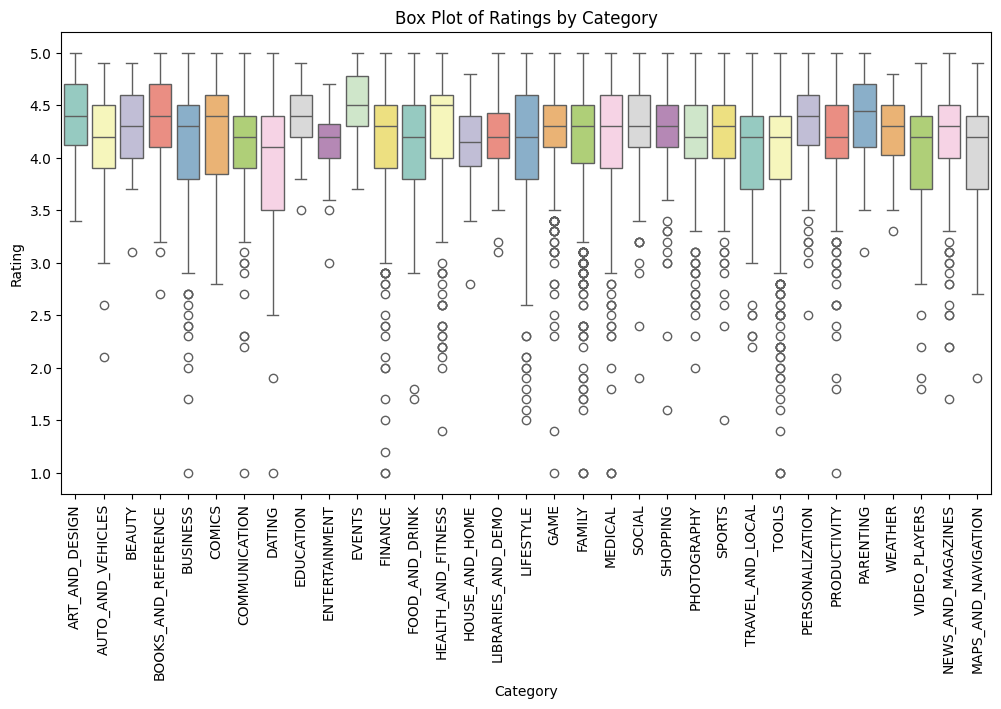

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

# Display basic information about datasets
print("Apps Dataset Info:")
print(apps_df.info())
print("\nUser Reviews Dataset Info:")
print(reviews_df.info())

# Handling missing values
apps_df.dropna(inplace=True)
reviews_df.dropna(inplace=True)

# Convert 'Installs' column to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Price' column to numeric
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '', regex=True)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce').fillna(0.0)

# Convert 'Reviews' column to numeric
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

# Overview of app categories
category_counts = apps_df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# Average rating per category
category_ratings = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=category_ratings.index, x=category_ratings.values, palette='coolwarm')
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# Distribution of app prices
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Price'], bins=50, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xlim(0, 50)  # Limiting to 50 for better visualization
plt.show()

# Most reviewed apps
top_reviewed_apps = apps_df.nlargest(10, 'Reviews')[['App', 'Reviews']]
print("Top 10 Most Reviewed Apps:")
print(top_reviewed_apps)

# Visualizing the correlation matrix with only numeric columns
numeric_cols = apps_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of App Features')
plt.show()

# Distribution of app ratings
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Rating'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Scatter plot of Reviews vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x=apps_df['Installs'], y=apps_df['Reviews'], alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Installs (log scale)')
plt.ylabel('Reviews (log scale)')
plt.title('Reviews vs Installs')
plt.show()

# Box plot of Ratings by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Box Plot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()
